**Opening:**

Hai.. kali ini kita akan mengeksplor data dari twitter. Data yang akan kita coba cari tahu kali ini adalah tweet dari para netizen Australia soal pemilu yang diadakan tahun 2019. Tapi data yang dikumpulkan hanya berkisar 10 hari, yaitu dari tanggal 10-05-2019 sampai 20-05-2019. Seperti biasa, dari data yang ada kita akan melihat berbagai macam insight. Bahkan sampai habbit(kebiasaan) netizen Australia dalam menggunakan Twitter. Yuk langsung aja kita eksplore sama-sama.

## **Import Libraries**

In [79]:
import numpy as np
import pandas as pd
import os
import string
import re
import warnings 
warnings.filterwarnings('ignore')

#plotting libraries!
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#PLOTLY
import plotly
import chart_studio
import chart_studio.plotly as py
import plotly.offline as offline
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import cufflinks as cf
from collections import defaultdict
from plotly import tools
from plotly.graph_objs import Scatter, Figure, Layout
cf.set_config_file(offline=True)
from plotly import tools
from textblob import TextBlob
from nltk.corpus import stopwords
eng_stopwords = set(stopwords.words("english"))
from wordcloud import WordCloud, STOPWORDS
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
import pyLDAvis.sklearn
from pylab import bone, pcolor, colorbar, plot, show, rcParams, savefig
import squarify

## **Import Dataframe**

In [80]:
twitter_data = pd.read_csv('auspol2019.csv',parse_dates=['created_at','user_created_at'])
geo_data = pd.read_csv('location_geocode.csv')

In [81]:
twitter_data.head()

created_at                   id  \
0  2019-05-20 09:13:44  1130401208756187136   
1  2019-05-20 09:13:43  1130401205367140357   
2  2019-05-20 09:13:33  1130401162782371841   
3  2019-05-20 09:13:29  1130401143551434753   
4  2019-05-20 09:13:23  1130401118666809345   

                                           full_text  retweet_count  \
0  After the climate election: shellshocked green...            0.0   
1  @narendramodi @smritiirani Coverage of indian ...            0.0   
2  @workmanalice Do you know if Facebook is relea...            0.0   
3  @vanbadham We all understand we have a compuls...            0.0   
4  Shares were mixed in Asia, with India and Aust...            0.0   

   favorite_count       user_id          user_name user_screen_name  \
0             0.0  9.248486e+07       PIPELINEPETE         jocksjig   
1             0.0  7.756474e+08    Narinder Parmar      nparmar1957   
2             0.0  5.687300e+04        Peter Wells       peterwells   
3             0.0  9.081660e+17        The Realist    therealist822   
4             0.0  5.260074e+08  Inquirer Business      InquirerBiz   

                                    user_description  \
0  Retired Tradesman and Progressive Anti Conserv...   
1  Life coach & trainer, Motivational speaker, Ma...   
2  Writes for @theage and @smh on technology and ...   
3  Calls it as I see it. Anti PC, SJW and VS. If ...   
4  The official Twitter account of the Inquirer G...   

                user_location     user_created_at  
0        Brisbane, Queensland 2009-11-25 09:19:45  
1  Wollongong, NSW, AUSTRALIA 2012-08-23 10:20:40  
2                   Melbourne 2006-12-11 07:38:06  
3                         NaN 2017-09-14 03:10:30  
4                 Philippines 2012-03-16 03:51:59

In [82]:
geo_data.head()

name        lat        long
0        Brisbane, Queensland -27.469771  153.025124
1  Wollongong, NSW, AUSTRALIA -34.427812  150.893061
2                   Melbourne -37.813628  144.963058
3                 Philippines  12.879721  121.774017
4                   Australia -25.274398  133.775136

## **Menggabungkan 2 dataframe**

In [83]:
twitter_data = twitter_data.merge(geo_data, how='inner', left_on='user_location', right_on='name')

In [91]:
twitter_data.head()

created_at                   id  \
0  2019-05-20 09:13:44  1130401208756187136   
1  2019-05-20 09:12:57  1130401009782673408   
2  2019-05-20 09:02:04  1130398270813949952   
3  2019-05-20 07:25:41  1130374015103537152   
4  2019-05-20 07:12:01  1130370578584461313   

                                           full_text  retweet_count  \
0  After the climate election: shellshocked green...            0.0   
1  It is disappointing that @tanya_plibersek has ...            0.0   
2  'Vote for the climate': NSW demands environmen...            0.0   
3  This is urgent! “False election claims spark p...            0.0   
4  This is a great piece, not least because it pl...            0.0   

   favorite_count       user_id       user_name user_screen_name  \
0             0.0  9.248486e+07    PIPELINEPETE         jocksjig   
1             0.0  5.100258e+07  Matthew Rimmer         DrRimmer   
2             0.0  9.248486e+07    PIPELINEPETE         jocksjig   
3             0.0  3.327641e+08         E Ferri         eneferri   
4             2.0  2.180023e+09  Shahar Hameiri    ShaharHameiri   

                                    user_description         user_location  \
0  Retired Tradesman and Progressive Anti Conserv...  Brisbane, Queensland   
1  Professor of IP & Innovation Law @QUTLaw @QUT_...  Brisbane, Queensland   
2  Retired Tradesman and Progressive Anti Conserv...  Brisbane, Queensland   
3  Writer, researcher, educator in media, adverti...  Brisbane, Queensland   
4  Associate Professor @polsisengage @UQ_news. Po...  Brisbane, Queensland   

      user_created_at        lat        long  
0 2009-11-25 09:19:45 -27.469771  153.025124  
1 2009-06-26 10:17:54 -27.469771  153.025124  
2 2009-11-25 09:19:45 -27.469771  153.025124  
3 2011-07-10 11:20:43 -27.469771  153.025124  
4 2013-11-07 12:39:24 -27.469771  153.025124

In [85]:
twitter_data.drop('name', axis=1, inplace=True)

## **Check apakah dalam data terdapat null atan NaN**

In [87]:
twitter_data.isnull().mean()*100

created_at          0.000000
id                  0.000000
full_text           0.000000
retweet_count       0.000000
favorite_count      0.000000
user_id             0.000000
user_name           0.000000
user_screen_name    0.000000
user_description    4.115822
user_location       0.000000
user_created_at     0.000000
lat                 0.000000
long                0.000000
dtype: float64

**Objective**:

Ternyata kolom user_description memiliki NaN. Lalu apa yang harus dilakukan? Apakah kita langsung drop aja?
Tunggu dulu teman-teman... kita coba eksplore data lebih jauh lagi, apakah missing values bisa diisi dari feature lain. Jadi jangan buru-buru untuk drop ya.

## **Cari tahu batas maksimum dan minimum tanggal dalam kolom "created_at"**

In [88]:
print(f" Data Available since: {twitter_data.created_at.min()}")
print(f" Data Available upto: {twitter_data.created_at.max()}")

 Data Available since: 2019-05-10 16:58:15
 Data Available upto: 2019-05-20 11:40:07


## **Cari tahu data user terlama dan terbaru dalam kolom "user_created_at"**

In [89]:
print(f" Data Available since: {twitter_data.user_created_at.min()}")
print(f" Data Available upto: {twitter_data.user_created_at.max()}")

 Data Available since: 2006-03-21 21:04:12
 Data Available upto: 2019-05-19 10:49:59


## **Siapakah user terlama?**

In [94]:
twitter_data.loc[twitter_data['user_created_at'] == '2006-03-21 21:04:12','user_name'].values[0]

'rabble'

## **Siapakah user terbaru?**

In [95]:
twitter_data.loc[twitter_data['user_created_at']== '2019-05-19 10:49:59','user_name'].values[0]

'NewsaCol®️'

## **Jumlah tweet berdasarkan tanggal**

C:\Users\Hp\AppData\Roaming\Python\Python37\site-packages\matplotlib\cbook\__init__.py:2347: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working

C:\Users\Hp\AppData\Roaming\Python\Python37\site-packages\matplotlib\cbook\__init__.py:2364: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working



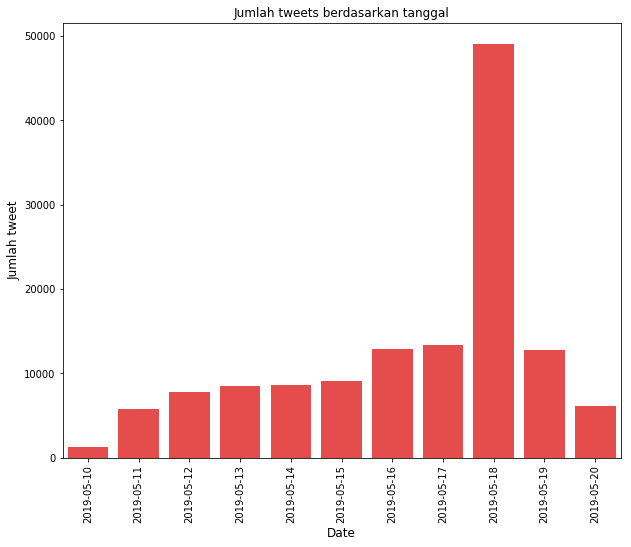

In [14]:
twitter_data['created_at']= pd.to_datetime(twitter_data['created_at'])
jumlah = twitter_data['created_at'].dt.date.value_counts()
jumlah = jumlah.sort_index()

plt.figure(figsize=(10,8))
sns.barplot(jumlah.index, jumlah.values, alpha=.8, color='red')
plt.xticks(rotation='vertical')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Jumlah tweet', fontsize=12)
plt.title('Jumlah tweets berdasarkan tanggal')
plt.show()

**Objective:**

Ternyata jumlah cuitan terbanyak terjadi pada tanggal 18 Mei 2019. Hal ini dikarenakan pemilu di Autralia berlangsung pada tanggal tersebut.

## **Top 10 jumlah akun baru berdasarkan tanggal**

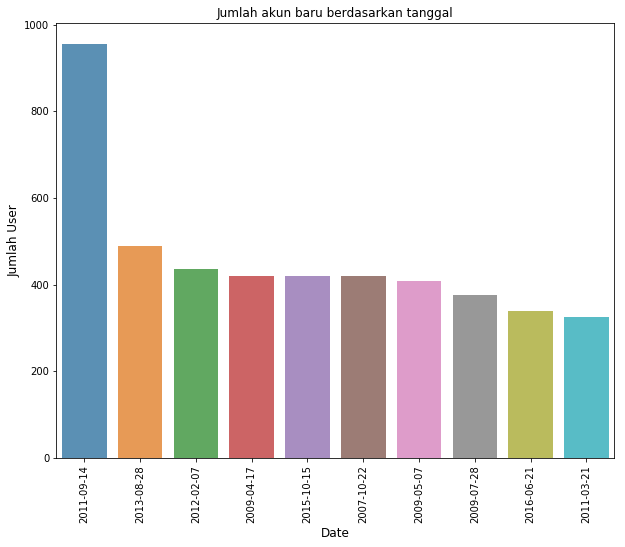

In [96]:
twitter_data['user_created_at'] = pd.to_datetime(twitter_data['user_created_at'])
jumlah_akun = twitter_data['user_created_at'].dt.date.value_counts()
jumlah_akun = jumlah_akun[:10]

plt.figure(figsize=(10,8))
sns.barplot(jumlah_akun.index, jumlah_akun.values, alpha=.8)
plt.xticks(rotation='vertical')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Jumlah User', fontsize=12)
plt.title('Jumlah akun baru berdasarkan tanggal')
plt.show()

**Objective:**

Akun baru paling banyak dibuat pada tanggal 14-09-2011. Seperti yang kita tahu Twitter memang tengah booming di tahun 2011.

## **Cari tahu hari dalam kolom 'created_at' dan 'user_created_at'**

In [98]:
twitter_data['tweeted_day_of_week'] = twitter_data['created_at'].dt.weekday_name
twitter_data['created_day_of_week'] = twitter_data['user_created_at'].dt.weekday_name

AttributeError: Can only use .dt accessor with datetimelike values

## **Plotting jumlah tweet perhari dalam satu minggu**

In [97]:
cnt_ = twitter_data['tweeted_day_of_week'].value_counts()
cnt_ = cnt_.sort_index() 
fig = {
  "data": [
    {
      "values": cnt_.values,
      "labels": cnt_.index,
      "domain": {"x": [0, .5]},
      "name": "Number of tweets per day",
      "hoverinfo":"label+percent+name",
      "hole": .3,
      "type": "pie"
    },],
  "layout": {
        "title":"Persentase Tweets perhari dalam satu minggu",
        "annotations": [
            { "font": { "size": 20},
              "showarrow": False,
                "x": 0.50,
                "y": 1
            },
        ]
    }
}
iplot(fig)
cnt_

KeyError: 'tweeted_day_of_week'

## **Treemap jumlah tweet perhari dalam satu minggu**

In [19]:
x = 0.
y = 0.
width = 50.
height = 50.
type_list = list(twitter_data['tweeted_day_of_week'].unique())
values = [len(twitter_data[twitter_data['tweeted_day_of_week'] == i]) for i in type_list]

normed = squarify.normalize_sizes(values, width, height)
rects = squarify.squarify(normed, x, y, width, height)

clr = ['#2D3142','#4F5D75','#BFC0C0','#F2D7EE','#EF8354','#839788','#EEE0CB']
shapes = []
annotations = []
n = 0

for r in rects:
    shapes.append( 
        dict(
            type = 'rect', 
            x0 = r['x'], 
            y0 = r['y'], 
            x1 = r['x']+r['dx'], 
            y1 = r['y']+r['dy'],
            line = dict( width = 2 ),
            fillcolor = clr[n]
        ) 
    )

    annotations.append(
        dict(
            x = r['x']+(r['dx']/2),
            y = r['y']+(r['dy']/2),
            text = "{}-{}".format(type_list[n], values[n]),
            showarrow = False
        )
    )
    n = n + 1
    if n >= len(clr):
        n = 0

# For hover text
trace0 = go.Scatter(
    x = [ r['x']+(r['dx']/2) for r in rects ], 
    y = [ r['y']+(r['dy']/2) for r in rects ],
    text = [ str(v) for v in values ], 
    mode = 'text',
)
        
layout = dict(
    height=700, 
    width=700,
    xaxis=dict(showgrid=False,zeroline=False),
    yaxis=dict(showgrid=False,zeroline=False),
    shapes=shapes,
    annotations=annotations,
    hovermode='closest',
    font=dict(color="#FFFFFF")
)

# With hovertext
figure = dict(data=[trace0], layout=layout)
iplot(figure, filename='squarify-treemap')

**Objective:**

Ternyata persentase terbesar cuitan terjadi pada hari Sabtu dan Minggu. Hal ini mungkin terjadi sebab kedua hari tersebut merupakan weekend. Dari insight ini bisa kita ketahui habbit dari warga Australia yang lebih banyak mengunngah tweet pada saat weekend.

## **Plotting Jumlah akun baru perhari dalam satu minggu**

In [20]:
crt_ = twitter_data['created_day_of_week'].value_counts()
crt_ = crt_.sort_index() 
fig = {
  "data": [
    {
      "values": crt_.values,
      "labels": crt_.index,
      "domain": {"x": [0, .5]},
      "name": "Number of tweets per day",
      "hoverinfo":"label+percent+name",
      "hole": .3,
      "type": "pie"
    },],
  "layout": {
        "title":"Persentase Jumlah akun baru perhari dalam satu minggu",
        "annotations": [
            { "font": { "size": 20},
              "showarrow": False,
                "x": 0.50,
                "y": 1
            },
        ]
    }
}
iplot(fig)
cnt_

Friday       14622
Monday       14651
Saturday     54879
Sunday       20598
Thursday     12891
Tuesday       8600
Wednesday     9139
Name: tweeted_day_of_week, dtype: int64

## **Treemap Jumlah akun baru perhari dalam satu minggu**

In [21]:
x = 0.
y = 0.
width = 50.
height = 50.
type_list = list(twitter_data['created_day_of_week'].unique())
values = [len(twitter_data[twitter_data['created_day_of_week'] == i]) for i in type_list]

normed = squarify.normalize_sizes(values, width, height)
rects = squarify.squarify(normed, x, y, width, height)

clr = ['#2D3142','#4F5D75','#BFC0C0','#F2D7EE','#EF8354','#839788','#EEE0CB']
shapes = []
annotations = []
n = 0

for r in rects:
    shapes.append( 
        dict(
            type = 'rect', 
            x0 = r['x'], 
            y0 = r['y'], 
            x1 = r['x']+r['dx'], 
            y1 = r['y']+r['dy'],
            line = dict( width = 2 ),
            fillcolor = clr[n]
        ) 
    )

    annotations.append(
        dict(
            x = r['x']+(r['dx']/2),
            y = r['y']+(r['dy']/2),
            text = "{}-{}".format(type_list[n], values[n]),
            showarrow = False
        )
    )
    n = n + 1
    if n >= len(clr):
        n = 0

# For hover text
trace0 = go.Scatter(
    x = [ r['x']+(r['dx']/2) for r in rects ], 
    y = [ r['y']+(r['dy']/2) for r in rects ],
    text = [ str(v) for v in values ], 
    mode = 'text',
)
        
layout = dict(
    height=700, 
    width=700,
    xaxis=dict(showgrid=False,zeroline=False),
    yaxis=dict(showgrid=False,zeroline=False),
    shapes=shapes,
    annotations=annotations,
    hovermode='closest',
    font=dict(color="#FFFFFF")
)

# With hovertext
figure = dict(data=[trace0], layout=layout)
iplot(figure, filename='squarify-treemap')

**Objective:**

Netizen Australia lebih banyak membuat akun baru di hari Rabu

## ** Cari tahu data waktu dalam kolom 'created_at' dan 'user_created_at'**

In [22]:
twitter_data['created_at_hour'] = twitter_data['created_at'].dt.hour
twitter_data['user_created_at_hour'] = twitter_data['user_created_at'].dt.hour

**Plotting data waktu**

In [23]:
wkt_ = twitter_data['created_at_hour'].value_counts()
wkt_ = wkt_.sort_index() 
trace1 = go.Scatter(
                    x = wkt_.index,
                    y = wkt_.values,
                    mode = "lines",
                    name = "citations",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)')
                    )

data = [trace1]
layout = dict(title = 'Jumlah tweet perjam',
              xaxis= dict(title= 'Jumlah tweet perjam',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

**Objective:**

Netizen Australia lebih produktif mengunggah cuitan pada jam 10 pagi

In [24]:
cnt_ = twitter_data['user_created_at_hour'].value_counts()
cnt_ = cnt_.sort_index() 
trace1 = go.Scatter(
                    x = cnt_.index,
                    y = cnt_.values,
                    mode = "lines",
                    name = "citations",
                    marker = dict(color = 'rgba(210, 113, 25, 0.8)')
                    )

data = [trace1]
layout = dict(title = 'Jumlah user baru perjam',
              xaxis= dict(title= 'Jumlah user baru perjam',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

**Objective:**

Ternyata jumlah user baru terbanyak terjadi pada jam 2 dini hari. Apakah kebanyakan warga Austarlia menderita insomnia dan untuk menghilangkan rasa bosan adalah membuat akun baru di twitter. Hehe...

## **Cari tahu retweet terbanyak dan tweet terfavorit**

In [25]:
print(f" Maximum number of retweets {twitter_data.retweet_count.max()}")
print(f" Maximum number of favorites {twitter_data.favorite_count.max()}")

 Maximum number of retweets 6622.0
 Maximum number of favorites 15559.0


In [26]:
twitter_data.loc[twitter_data['retweet_count']==6622.0,'full_text'].values

"Shocking defeat for Left in Australia, stunned pollsters and mainstream media who had predicted this election as 'unlosable for Labor'. Conservative @ScottMorrisonMP focused on 'Australian First', Jobs and Imigration, while Labor focused on #ClimateChange https://t.co/hFt7vgwuEd"

In [27]:
twitter_data.loc[twitter_data['favorite_count']==15559.0,['full_text','user_name','user_description']].values

"Shocking defeat for Left in Australia, stunned pollsters and mainstream media who had predicted this election as 'unlosable for Labor'. Conservative @ScottMorrisonMP focused on 'Australian First', Jobs and Imigration, while Labor focused on #ClimateChange https://t.co/hFt7vgwuEd"

**Objective:**

Tweet yang paling banyak di-retweet dan tweet favorit berasal dari akun yang sama yaitu Sara A. Carter.

In [28]:
twitter_data['user_name'].value_counts()[:5]

💧 Sur Plus               937
PM of Australia News     464
🌹MsRose🌹                 415
🍌Leftie Troublemaker🍍    386
Jackie Moss ☔️           300
Name: user_name, dtype: int64

## **Wordcloud**

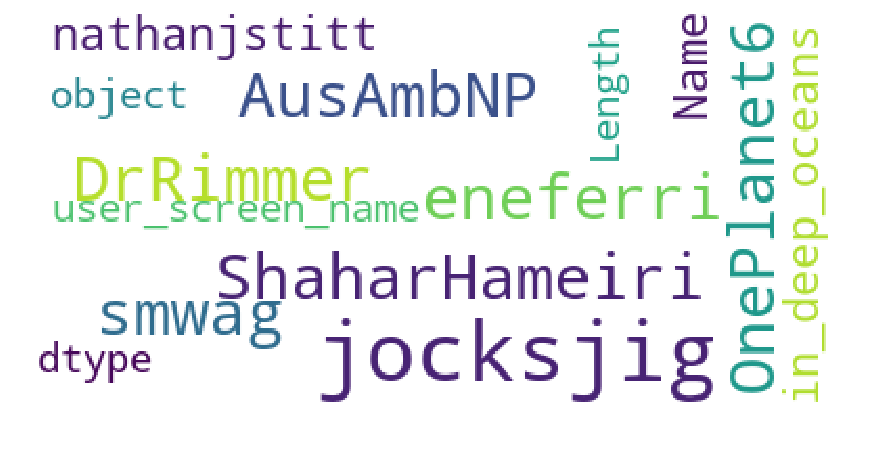

In [31]:
wordcloud__ = WordCloud(
                          background_color='white',
                          stopwords=set(STOPWORDS),
                          max_words=250,
                          max_font_size=40, 
                          random_state=1705
                         ).generate(str(twitter_data['user_screen_name'].dropna()))
def cloud_plot(wordcloud):
    fig = plt.figure(1, figsize=(15,8))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
cloud_plot(wordcloud__)

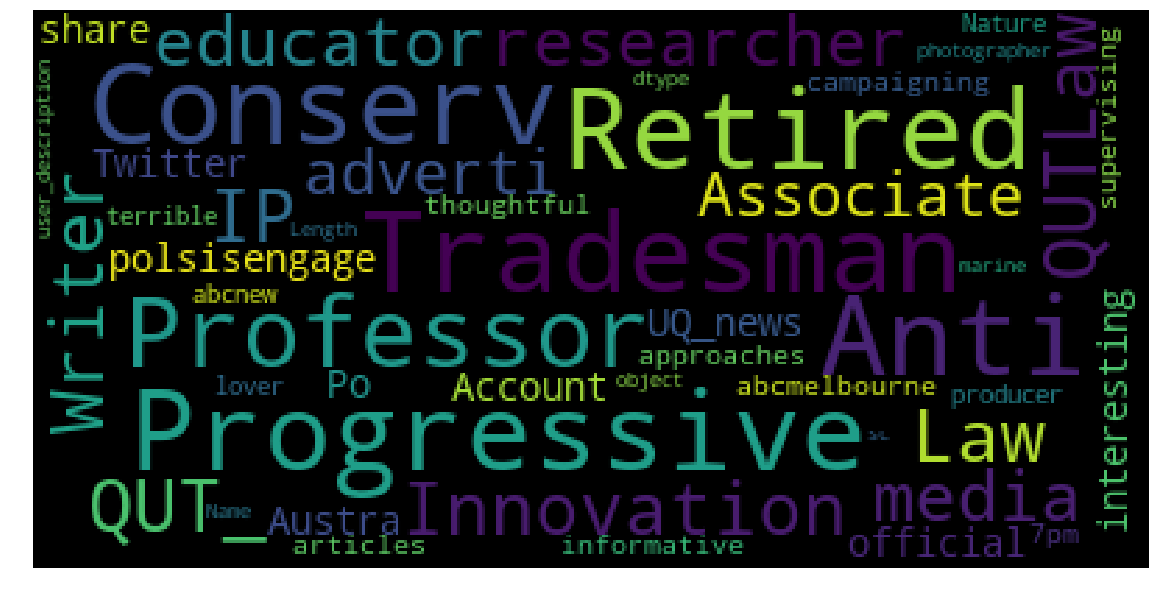

In [32]:
wordcloud_ = WordCloud(
                          background_color='black',
                          stopwords=set(STOPWORDS),
                          max_words=250,
                          max_font_size=40, 
                          random_state=1705
                         ).generate(str(twitter_data['user_description'].dropna()))
def cloud_plot(wordcloud):
    fig = plt.figure(1, figsize=(20,15))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
cloud_plot(wordcloud_)

## **Analysis sentiment dari masing-masing tweet**

In [33]:
twitter_data['sentiment'] = twitter_data['full_text'].map(lambda i: TextBlob(i).sentiment.polarity)

## **Cari tahu perbedaan sentiment polarity**

In [34]:
print("5 random tweets with highest positive sentiment polarity: \n")
print(" ")
positive = twitter_data.loc[twitter_data['sentiment']==1, ['full_text']].sample(5).values
for p in positive:
    print(p[0])
    print()

5 random tweets with highest positive sentiment polarity: 

 
If @ScottMorrisonMP can win this election ; You can literally achieve anything in your life. What a turn around congratulations Scomo! #auspol #ausvotes

@lionheartleojai @BillBillshaw @SBSNews Outrage? Maybe because  @TonyAbbottMHR
had nicer things to say about a convicted paedophile than he did about one of our greatest leaders?
-- @Fennylb
#ausvotes

Sunday 12 May - Cake by @EmilieCollyer
Who doesn't want their piece of it? What's a rhetorical question?
#auspol #ausvote2019 #playwriting #electiondrama
Follow us for a play a day by some of Melbourne's best dramatists during #ausvotes https://t.co/ldt96WxLaj

Yanis’ daughter is the perfect example of how indoctrination manifests delusion.. #auspol #ausvotes https://t.co/E1J4kfK3Gu

@drlauraduggan @Eleytherius Mmmm, delicious democracy sausage! At many/most voting stations, there’s also a sausage sizzle. You vote, and reward yourself with a sausage! #ausvotes



In [35]:
print("5 random tweets with highest nagative sentiment polarity: \n")
print(" ")
negative = twitter_data.loc[twitter_data['sentiment']==-1, ['full_text']].sample(5).values
for n in negative:
    print(n[0])
    print()

5 random tweets with highest nagative sentiment polarity: 

 
@Jim_Pembroke According to ScuMo nothing to see here, but can you imagine if Labor had done this????? The Libs would be screaming from the rooftops for the sacking of everyone....What a bloody lying pack of grubs!!!!! #auspol

Disgusted! @ShireenMorrisMs has been targeted overnight by racist, islamaphobic supporters of @MichaelSukkarMP VOTE THIS BIGOT OUT #auspol https://t.co/LfSy3LduaK

I have to ... wonder....

Australia’s conservative party retains power in shocking election result - Vox https://t.co/Q22HjjXQlx

.@billshortenmp vows to review case of Biloela Tamil family facing deportation https://t.co/0LZpy7mqph

@ScottMorrisonMP &amp; @PeterDutton_MP are kicking these people (who have been welcomed into our community) out while they have allowed genocidal murderers in! Disgusting! #auspol

Well no surprise, the fake media lied!  Bogus poles!!!
#AUSVote19 #AustraliaDecides #auspol



In [36]:
print("5 random tweets with neutral sentiment polarity: \n")
neutral = twitter_data.loc[twitter_data.sentiment==0, ['full_text']].sample(5).values
for i in neutral:
    print(i[0])
    print()

5 random tweets with neutral sentiment polarity: 

Jesus god damn Christ Australia...are you masochistic? 
#auspol

@MonteBovill While you’re touring polling places, wanna scope out the food offerings for vegos? It’ll influence where I vote. #auspol

In the #Nicholls electorate, Rikkie-Lee Tyrrell from @OneNationAus and @billlodwick4mp from @AustralianLabor are neck-and-neck in first-preference votes, currently at around 14 per cent apiece. @RiverineHerald #ausvotes

I don't buy the premise that we can't ask politicians, especially leaders, if they hold hateful views towards portions of society. You are there to govern for everyone. If you can't face that, then go join the church and not politics. #auspol

Over it  #AustraliaDecides https://t.co/iIqgtpKJ3u



In [37]:
trace1 = go.Histogram(
    x = twitter_data['sentiment'],
    opacity=0.75,
    name = "Sentiment",
    marker=dict(color='rgba(122, 75, 196, 0.6)'))

data = [trace1]
layout = go.Layout(barmode='overlay',
                   title='Histogram plot of sentiment',
                   xaxis=dict(title='Sentiment'),
                   yaxis=dict( title='Count'),
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

**Objective:**

Sebagian besar tweet memiliki sentiment yang netral

## **Mapping sentiment berdasarkan polaritasnya (positif, negatif, netral)**

In [38]:
cut = pd.cut(
    twitter_data['sentiment'],
    [-np.inf, -.01, .01, np.inf],
    labels=['negative', 'neutral', 'positive']
)
twitter_data['polarity'] = cut.values
twitter_data[['polarity','sentiment']][:20]

polarity  sentiment
0   negative  -0.200000
1   negative  -0.600000
2    neutral   0.000000
3   negative  -0.200000
4   negative  -0.035714
5   positive   0.500000
6   positive   0.136364
7   positive   0.050000
8   positive   0.300000
9   positive   0.200000
10   neutral   0.000000
11  negative  -0.250000
12  positive   0.366667
13   neutral  -0.002222
14  positive   0.500000
15   neutral   0.000000
16   neutral   0.000000
17  negative  -0.266667
18  positive   0.125000
19   neutral   0.000000

In [39]:
twitter_data['polarity'].value_counts()

positive    58448
neutral     48831
negative    28101
Name: polarity, dtype: int64

## **Radar chart untuk polaritas**

In [41]:
data = [go.Scatterpolar(
                        r = [twitter_data['polarity'].value_counts()[0],twitter_data['polarity'].value_counts()[1],twitter_data['polarity'].value_counts()[2]],
                        theta = list(twitter_data['polarity'].unique()),
                        fill = 'toself'
                    )]

layout = go.Layout(
  polar = dict(
    radialaxis = dict(
      visible = True,
      range = [0, 60000]
    )
  ),
  showlegend = False,
  title ='Radar chart of polarities'
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename = "Radar Chart Polarities")

In [42]:
twitter_data['count_sent']=twitter_data["full_text"].apply(lambda x: len(re.findall("\n",str(x)))+1)
#Word count in each comment:
twitter_data['count_word']=twitter_data["full_text"].apply(lambda x: len(str(x).split()))
#Unique word count
twitter_data['count_unique_word']=twitter_data["full_text"].apply(lambda x: len(set(str(x).split())))
#Letter count
twitter_data['count_letters']=twitter_data["full_text"].apply(lambda x: len(str(x)))
#punctuation count
twitter_data["count_punctuations"] =twitter_data["full_text"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
#upper case words count
twitter_data["count_words_upper"] = twitter_data["full_text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
#title case words count
twitter_data["count_words_title"] = twitter_data["full_text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
#Number of stopwords
twitter_data["count_stopwords"] = twitter_data["full_text"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))
#Average length of the words
twitter_data["mean_word_len"] = twitter_data["full_text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [43]:
twitter_data.describe().T

count          mean           std         min  \
retweet_count         135380.0  4.063806e+00  4.038760e+01    0.000000   
favorite_count        135380.0  1.205471e+01  1.275849e+02    0.000000   
user_id               135380.0  1.570645e+17  3.525078e+17   22.000000   
lat                   135380.0 -2.018124e+01  2.755893e+01  -82.862752   
long                  135380.0  1.106561e+02  7.855528e+01 -175.198242   
created_at_hour       135380.0  9.892251e+00  6.836245e+00    0.000000   
user_created_at_hour  135380.0  9.218415e+00  6.749257e+00    0.000000   
sentiment             135380.0  7.946320e-02  2.815131e-01   -1.000000   
count_sent            135380.0  1.850266e+00  1.859723e+00    1.000000   
count_word            135380.0  2.335182e+01  1.313643e+01    1.000000   
count_unique_word     135380.0  2.176205e+01  1.150962e+01    1.000000   
count_letters         135380.0  1.611169e+02  7.983896e+01    7.000000   
count_punctuations    135380.0  9.504277e+00  5.329207e+00    0.000000   
count_words_upper     135380.0  7.221303e-01  1.651610e+00    0.000000   
count_words_title     135380.0  3.535109e+00  2.867331e+00    0.000000   
count_stopwords       135380.0  7.936490e+00  6.205081e+00    0.000000   
mean_word_len         135380.0  6.583209e+00  2.335292e+00    1.933333   

                               25%           50%           75%           max  
retweet_count         0.000000e+00  0.000000e+00  1.000000e+00  6.622000e+03  
favorite_count        0.000000e+00  1.000000e+00  4.000000e+00  1.555900e+04  
user_id               7.356489e+07  3.675327e+08  2.590368e+09  1.130063e+18  
lat                  -3.528094e+01 -3.292827e+01 -2.527440e+01  9.000000e+01  
long                  1.337751e+02  1.449631e+02  1.512093e+02  1.784501e+02  
created_at_hour       4.000000e+00  9.000000e+00  1.300000e+01  2.300000e+01  
user_created_at_hour  4.000000e+00  8.000000e+00  1.300000e+01  2.300000e+01  
sentiment             0.000000e+00  0.000000e+00  2.000000e-01  1.000000e+00  
count_sent            1.000000e+00  1.000000e+00  2.000000e+00  4.500000e+01  
count_word            1.300000e+01  2.100000e+01  3.300000e+01  9.800000e+01  
count_unique_word     1.200000e+01  2.000000e+01  3.100000e+01  9.400000e+01  
count_letters         9.700000e+01  1.480000e+02  2.260000e+02  9.690000e+02  
count_punctuations    6.000000e+00  9.000000e+00  1.200000e+01  9.100000e+01  
count_words_upper     0.000000e+00  0.000000e+00  1.000000e+00  5.200000e+01  
count_words_title     2.000000e+00  3.000000e+00  5.000000e+00  4.700000e+01  
count_stopwords       3.000000e+00  7.000000e+00  1.200000e+01  8.000000e+01  
mean_word_len         5.222222e+00  6.000000e+00  7.166667e+00  1.290000e+02

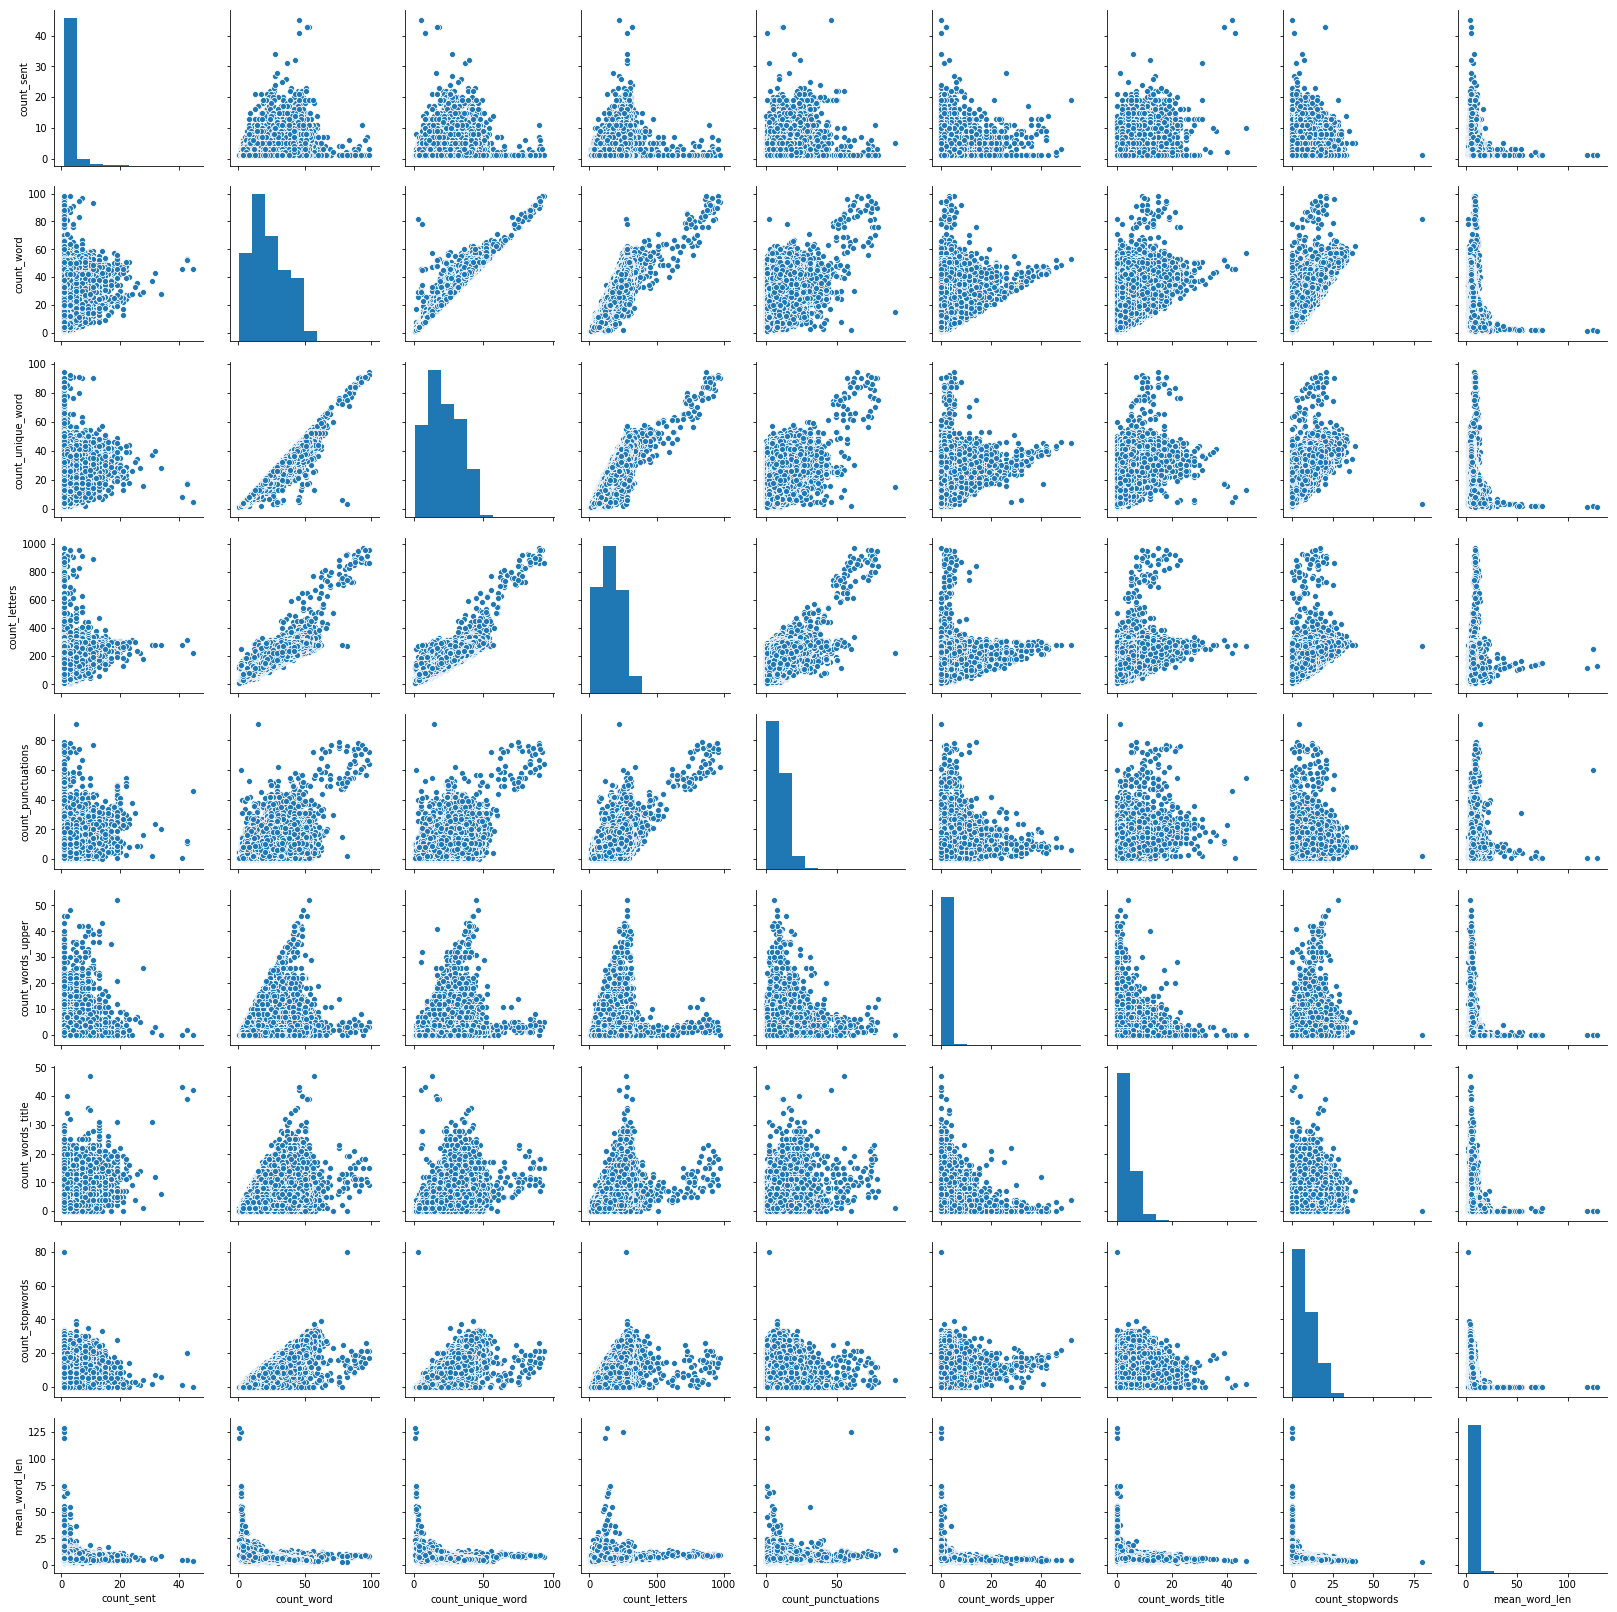

In [44]:
sample_df = twitter_data[['count_sent','count_word','count_unique_word','count_letters','count_punctuations','count_words_upper','count_words_title','count_stopwords','mean_word_len' ]]
sns.pairplot(sample_df,palette="husl")
del sample_df

## **Ngram Visualization**

In [45]:
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

## custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace


freq_dict = defaultdict(int)
for sent in twitter_data["full_text"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'blue')


fig = tools.make_subplots(rows=1, cols=1, vertical_spacing=0.04,
                          subplot_titles=["Frequent words"
                                          ])
fig.append_trace(trace0, 1, 1)

fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
iplot(fig, filename='word-plots.html')

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\plotly\tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\plotly\basedatatypes.py:1663: DeprecationWarning:

The append_trace method is deprecated and will be removed in a future version.
Please use the add_trace method with the row and col parameters.




In [46]:
freq_dict = defaultdict(int)
for sent in twitter_data["full_text"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'orange')

fig = tools.make_subplots(rows=1, cols=1, vertical_spacing=0.04,horizontal_spacing=0.15,
                          subplot_titles=["Frequent bigrams"
                                          ])
fig.append_trace(trace0, 1, 1)
fig['layout'].update(height=1200, width=1000, paper_bgcolor='rgb(233,233,233)', title="Bigram Count Plots")
iplot(fig, filename='word-plots')

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\plotly\tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\plotly\basedatatypes.py:1663: DeprecationWarning:

The append_trace method is deprecated and will be removed in a future version.
Please use the add_trace method with the row and col parameters.




In [57]:
chart_studio.tools.set_credentials_file(username='amelgikha', api_key='6RMiW85oX0nagnJ4ckSy')
freq_dict = defaultdict(int)
for sent in twitter_data["full_text"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'green')

fig = tools.make_subplots(rows=1, cols=1, vertical_spacing=0.04, horizontal_spacing=0.2,
                          subplot_titles=["Frequent trigrams", 
                                          ])
fig.append_trace(trace0, 1, 1)
fig['layout'].update(height=1200, width=1500, paper_bgcolor='rgb(233,233,233)', title="Trigram Count Plots")
py.iplot(fig, filename='word-plots')

## **Plotting jumlah tweet berdasarkan negara-negara bagian (Top 20)**

In [58]:
usr_ = twitter_data['user_location'].value_counts()
usr_.reset_index()
usr_ = usr_[:20,]
trace1 = go.Bar(
                x = usr_.index,
                y = usr_.values,
                name = "Number of tweets on Australia polls by state.",
                marker = dict(color = 'rgba(200, 74, 55, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                )

data = [trace1]
layout = go.Layout(barmode = "group",title = 'Number of tweets on Australia polls by state.')
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [70]:
data = [go.Scattermapbox(
            lat= twitter_data['lat'][:5000] ,
            lon= twitter_data['long'][:5000],
            mode='markers',
            marker=dict(
                size= 4,
                color = 'orange',
                opacity = .8,
            ),
          )]
layout = go.Layout(
    title = go.layout.Title(
        text = 'Tweets on Australia polls by state'
    ),
    geo = go.layout.Geo(
        scope = 'world',
        projection = go.layout.geo.Projection(type = 'albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)'),
)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'd3-cloropleth')

In [71]:
trace1 = go.Scattermapbox(
            lat= twitter_data.loc[twitter_data['polarity'] == 'negative','lat'][:5000] ,
            lon= twitter_data.loc[twitter_data['polarity'] == 'negative','long'][:5000],
            mode='markers',
            marker=dict(
                size= 4,
                color = 'black',
                opacity = .5,
            ),
          )
trace2= go.Scattermapbox(
            lat= twitter_data.loc[twitter_data['polarity'] == 'neutral','lat'][:5000] ,
            lon= twitter_data.loc[twitter_data['polarity'] == 'neutral','long'][:5000],
            mode='markers',
            marker=dict(
                size= 4,
                color = 'blue',
                opacity = .3,
            ),
          )
trace3= go.Scattermapbox(
            lat= twitter_data.loc[twitter_data['polarity'] == 'positive','lat'][:5000] ,
            lon= twitter_data.loc[twitter_data['polarity'] == 'positive','long'][:5000],
            mode='markers',
            marker=dict(
                size= 4,
                color = 'gold',
                opacity = .2,
            ),
          )


data = [trace1,trace2,trace3]
layout = go.Layout(
    title = go.layout.Title(
        text = 'Tweets on Australia polls according to polarity by state '
    ),
    geo = go.layout.Geo(
        scope = 'world',
        projection = go.layout.geo.Projection(type = 'albers usa'),
        showlakes = True,
        lakecolor = 'rgb(200, 125, 255)'),
)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'd3-cloropleth-ma')

## **Modeling**

Topik modeling adalah jenis pemodelan statistik untuk menemukan "topik" abstrak yang ada dalam dataset. Pada kasus kali ini kita akan menggunakan model Latent Dirichlet Allocation (LDA) yaitu salah satu model yang dipakai untuk topik modeling. Model LDA juga bisa digunakan untuk mengklasifikasikan teks dalam data ke topik tertentu. Itu membangun topik per dokumen bahkan perkata. Sesuai namanya, LDA menggunakan distribusi Dirichlet dalam membangun modelnya.

### **Count Vectorizer**

In [72]:
vec = CountVectorizer(min_df=5, max_df=0.9, stop_words='english', lowercase=True, token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')
tweets_vectorized = vec.fit_transform(twitter_data['full_text'])

### **Fit Model**

In [73]:
lda = LatentDirichletAllocation(n_components=10, max_iter=5, learning_method='online',verbose=True)
tweets_lda = lda.fit_transform(tweets_vectorized)

iteration: 1 of max_iter: 5
iteration: 2 of max_iter: 5
iteration: 3 of max_iter: 5
iteration: 4 of max_iter: 5
iteration: 5 of max_iter: 5


### **Print Keyword**

In [74]:
def selected_topics(model, vectorizer, top_n=10):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-top_n - 1:-1]])

In [75]:
print("Tweets LDA Model:")
selected_topics(lda, vec)

Tweets LDA Model:
Topic 0:
[('auspol', 4650.353166041841), ('campaign', 3619.0573374582054), ('does', 1970.1265367826834), ('new', 1640.1449597042013), ('need', 1504.9697742601898), ('people', 1465.1181528169916), ('just', 1455.1763686450513), ('women', 1389.164428867737), ('like', 1350.8466721342195), ('life', 1214.8650654059143)]
Topic 1:
[('amp', 9265.402774529432), ('auspol', 6103.9327188803445), ('lnp', 2201.2322595777555), ('scomo', 1982.1021431119048), ('policies', 1811.357653981491), ('policy', 1682.7051814332472), ('govt', 1311.9576140881786), ('barnaby', 1241.7919679101897), ('coal', 1179.3936147313902), ('lies', 1173.4092985663808)]
Topic 2:
[('good', 3608.25169373636), ('auspol', 3458.606510999634), ('political', 2949.7937582690975), ('australianlabor', 2886.5290792467727), ('abcnews', 2836.9438605759183), ('https', 2358.8406934849154), ('billshortenmp', 1751.9928645586633), ('coverage', 1653.1648557543147), ('eurovision', 1584.9454894585685), ('live', 1228.4204890044557)]


### **Visualisasi hasil model dengan pyLDAvis**

In [76]:
pyLDAvis.enable_notebook()
dash = pyLDAvis.sklearn.prepare(lda, tweets_vectorized, vec, mds='tsne')
dash

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
8     -334.228943  304.093933       1        1  16.036391
7     -562.836365   -5.251779       2        1  13.797985
4      439.549835    9.412613       3        1  13.247655
9      337.344788 -390.463715       4        1  11.914307
6     -243.087234 -125.063370       5        1   8.623247
1      -27.297758  545.340393       6        1   8.289104
0      335.928497  367.257111       7        1   7.771202
2        9.039686  177.334671       8        1   7.246965
3     -104.699554 -467.442841       9        1   7.001883
5       99.272743 -134.722137      10        1   6.071260, topic_info=      Category          Freq       Term         Total  loglift  logprob
1254   Default  69712.000000   ausvotes  69712.000000  30.0000  30.0000
8180   Default  77835.000000      https  77835.000000  29.0000  29.0000
5508   Default  27463.000000   election  27463.000000  28.0000  28.0000
1217   Default  25861.000000  australia  25861.000000  27.0000  27.0000
640    Default  11732.000000        amp  11732.000000  26.0000  26.0000
...        ...           ...        ...           ...      ...      ...
4334   Topic10    536.560362       deal    731.743075   2.4914  -5.2810
4167   Topic10    537.077079       cuts    800.864062   2.4021  -5.2800
14011  Topic10    578.284599       real   1493.200762   1.8530  -5.2061
15144  Topic10    480.913408       says   2402.442499   1.1931  -5.3904
7896   Topic10    459.166243       help   1300.292343   1.7607  -5.4367

[491 rows x 6 columns], token_table=       Topic      Freq          Term
term                                
29         2  0.963285        abbott
29         9  0.036488        abbott
34         4  0.999775           abc
48         8  0.999669       abcnews
189        7  0.998908           act
...      ...       ...           ...
19458      6  0.601945           yes
19459     10  0.998647     yesterday
19481      3  0.999065         young
19517      9  0.998836          zali
19519      9  0.998883  zalisteggall

[612 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 8, 5, 10, 7, 2, 1, 3, 4, 6])